## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [110]:
#Import all the necessary modules.
%matplotlib inline 
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

# Read the data as a data frame
df = pd.read_csv('students-data.csv', delimiter = ';')

df.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [111]:
# Performing basic EDA - Data type of each attribute.  
print("Data type of Dataset :\n",df.dtypes)

# Performing basic EDA - Shape of the data.    
print("Shape of Dataset :",df.shape)

## Performing basic EDA - Checking the presence of missing values. 
print("Checking the presence of missing values :", df.info())

## Performing basic EDA - Checking the presence of Null values. 
df[df.isnull().any(axis=1)]

Data type of Dataset :
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
Shape of Dataset : (395, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [112]:
type(df.index)

pandas.core.indexes.range.RangeIndex

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [113]:
df.select_dtypes(include=['object'])
#df.select_dtypes(exclude=['int64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no
9,GP,M,U,GT3,T,other,other,home,mother,no,yes,yes,yes,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [114]:
df.var(axis=0)

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [115]:
df_New = df.drop(['traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'Dalc'], axis=1)
df_New

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,yes,no,1,1,5,0,14,15,15


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [129]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

# instantiate labelencoder object
le = LabelEncoder()

#le.fit(["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"])
#list(le.classes_)

#df_New.head()
pd.get_dummies(df_New, columns=["school", "sex", "address", "famsize", "Pstatus", "Mjob", "Fjob", "reason", "guardian", "schoolsup", "famsup", "paid", "activities", "nursery", "higher", "internet", "romantic"]).head()

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,4,1,3,6,5,6,6,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,3,1,3,4,5,5,6,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,2,2,5,4,6,10,10,...,1,0,0,1,0,1,1,0,1,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [136]:
df_New

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,yes,yes,no,1,1,5,0,14,15,15


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

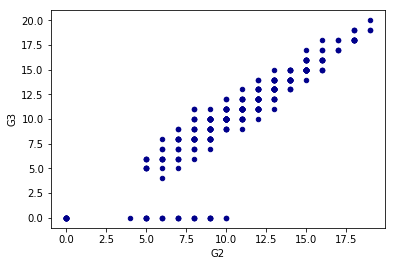

In [148]:
#sns.pairplot(df_New, diag_kind = 'kde')
df_New.plot.scatter(x='G2',y='G3',c='DarkBlue')


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

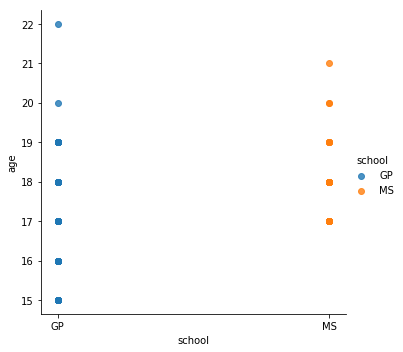

In [150]:
sns.lmplot(x='school', y='age', data=df_New,fit_reg=False, hue='school')

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

# Naive bayes with Iris data

### Import Iris.csv

In [152]:
#Import all the necessary modules.
%matplotlib inline 
from matplotlib import pyplot as plt

import warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

# Read the data as a data frame
df_iris = pd.read_csv('Iris.csv', delimiter = ',')

df_iris.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [170]:
df_iris.fillna(df_iris.mean(), inplace=True)

from sklearn.model_selection import train_test_split
array = df_iris.values
X = array[:,0:4] 
y = array[:,5]   #
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
type(X_train)



numpy.ndarray

### Find the distribution of target variable (Class)

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import recall_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.8913043478260869
[[14  0  0]
 [ 0  9  2]
 [ 0  3 18]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.75      0.82      0.78        11
 Iris-virginica       0.90      0.86      0.88        21

      micro avg       0.89      0.89      0.89        46
      macro avg       0.88      0.89      0.89        46
   weighted avg       0.89      0.89      0.89        46



### Plot the distribution of target variable using histogram

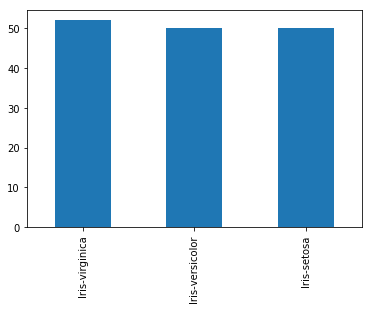

In [173]:
pd.value_counts(df_iris["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

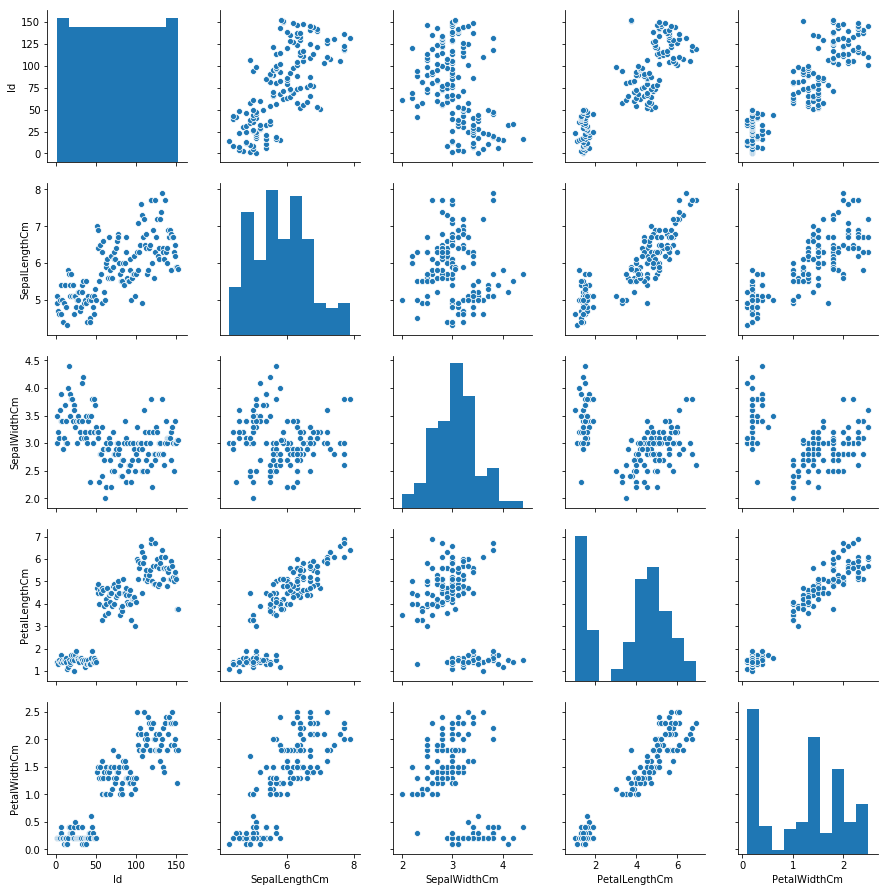

In [174]:
sns.pairplot(df_iris)

### Summary Statistics and explain insights for at least 2 variables

### Correlation among all variables and give your insights

### Split data in Training and Validation in 80:20

### Do Feature Scaling

### Train and Fit NaiveBayes Model

### Print Accuracy and Confusion Matrix and Conclude your findings